# 데이터 조사 시점: 2020/01/01 ~ 2020/12/31

# 조사기관 : 도로교통공단

# 데이터 다운로드 : https://www.data.go.kr/data/15070340/fileData.do


# 라이브러리 불러오기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium

# 구글 드라이브 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 폰트 설정

## colab용 폰트 설정

In [ ]:
!sudo apt-get install -y fonts-nanum 

!sudo fc-cache -fv 

!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
plt.rc("font", family="NanumBarungothic")
plt.rc("axes", unicode_minus=False)

## jupyter notebook용 폰트 설정

In [ ]:
# plt.rc("font", family="Malgun gothic")
# plt.rc("axes", unicode_minus=False)

In [ ]:
# plt.title("한글폰트설정")
# plt.plot([-4, -6, 1, 2, 0, 3])

# 데이터 분석

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/도로교통공단_사망 교통사고 정보_20201231.csv", encoding="cp949")

In [ ]:
df.head()

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2020,2020-01-01 05,야,수,1,0,0,0,0,서울,강남구,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,959928.0,1943154.0,127.046727,37.486761
1,2020,2020-01-01 05,야,수,1,0,0,0,0,경기,화성시,차대차,추돌,추돌,안전운전 의무 불이행,단일로,기타단일로,승용차,화물차,951237.0,1916995.0,126.950147,37.250560
2,2020,2020-01-01 07,주,수,1,0,0,0,0,충남,천안시,차대사람,횡단중,횡단중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,967688.0,1869920.0,127.137666,36.826933
3,2020,2020-01-01 10,주,수,1,0,0,0,0,경남,거창군,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,화물차,없음,1038413.0,1748968.0,127.924796,35.736290
4,2020,2020-01-01 11,주,수,1,0,0,0,0,경기,이천시,차량단독,도로이탈,도로이탈 추락,안전운전 의무 불이행,단일로,기타단일로,농기계,없음,1011197.0,1900537.0,127.626014,37.103415


In [ ]:
df.head()

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,사고유형_대분류,사고유형_중분류,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2020,2020-01-01 05,야,수,1,0,0,0,0,서울,강남구,차대사람,차도통행중,차도통행중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,959928.0,1943154.0,127.046727,37.486761
1,2020,2020-01-01 05,야,수,1,0,0,0,0,경기,화성시,차대차,추돌,추돌,안전운전 의무 불이행,단일로,기타단일로,승용차,화물차,951237.0,1916995.0,126.950147,37.250560
2,2020,2020-01-01 07,주,수,1,0,0,0,0,충남,천안시,차대사람,횡단중,횡단중,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,967688.0,1869920.0,127.137666,36.826933
3,2020,2020-01-01 10,주,수,1,0,0,0,0,경남,거창군,차량단독,공작물충돌,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,화물차,없음,1038413.0,1748968.0,127.924796,35.736290
4,2020,2020-01-01 11,주,수,1,0,0,0,0,경기,이천시,차량단독,도로이탈,도로이탈 추락,안전운전 의무 불이행,단일로,기타단일로,농기계,없음,1011197.0,1900537.0,127.626014,37.103415


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   발생년         2983 non-null   int64  
 1   발생년월일시      2983 non-null   object 
 2   주야          2983 non-null   object 
 3   요일          2983 non-null   object 
 4   사망자수        2983 non-null   int64  
 5   부상자수        2983 non-null   int64  
 6   중상자수        2983 non-null   int64  
 7   경상자수        2983 non-null   int64  
 8   부상신고자수      2983 non-null   int64  
 9   발생지시도       2983 non-null   object 
 10  발생지시군구      2983 non-null   object 
 11  사고유형_대분류    2983 non-null   object 
 12  사고유형_중분류    2983 non-null   object 
 13  사고유형        2983 non-null   object 
 14  가해자법규위반     2983 non-null   object 
 15  도로형태_대분류    2983 non-null   object 
 16  도로형태        2983 non-null   object 
 17  가해자_당사자종별   2983 non-null   object 
 18  피해자_당사자종별   2983 non-null   object 
 19  발생위치X_UTMK  2983 non-null  

In [ ]:
df.isnull().sum()

#결측치 X

발생년           0
발생년월일시        0
주야            0
요일            0
사망자수          0
부상자수          0
중상자수          0
경상자수          0
부상신고자수        0
발생지시도         0
발생지시군구        0
사고유형_대분류      0
사고유형_중분류      0
사고유형          0
가해자법규위반       0
도로형태_대분류      0
도로형태          0
가해자_당사자종별     0
피해자_당사자종별     0
발생위치X_UTMK    0
발생위치Y_UTMK    0
경도            0
위도            0
dtype: int64

In [ ]:
df.columns

Index(['발생년', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X_UTMK',
       '발생위치Y_UTMK', '경도', '위도'],
      dtype='object')

In [ ]:
columns = ["발생년월일시", "주야", "요일", "사망자수", "부상자수",
            "중상자수", "경상자수", "발생지시도", "발생지시군구",
           "사고유형_대분류", "사고유형", "가해자법규위반",
           "가해자_당사자종별", "피해자_당사자종별", "경도", "위도"]
df = df[columns].copy()

In [ ]:
df.head()

,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형,가해자법규위반,가해자_당사자종별,피해자_당사자종별,경도,위도
0,2020-01-01 05,야,수,1,0,0,0,서울,강남구,차대사람,차도통행중,안전운전 의무 불이행,승용차,보행자,127.046727,37.486761
1,2020-01-01 05,야,수,1,0,0,0,경기,화성시,차대차,추돌,안전운전 의무 불이행,승용차,화물차,126.950147,37.250560
2,2020-01-01 07,주,수,1,0,0,0,충남,천안시,차대사람,횡단중,안전운전 의무 불이행,승용차,보행자,127.137666,36.826933
3,2020-01-01 10,주,수,1,0,0,0,경남,거창군,차량단독,공작물충돌,안전운전 의무 불이행,화물차,없음,127.924796,35.736290
4,2020-01-01 11,주,수,1,0,0,0,경기,이천시,차량단독,도로이탈 추락,안전운전 의무 불이행,농기계,없음,127.626014,37.103415


# 데이터 시각화

In [ ]:
colors = sns.color_palette("Pastel2")
colors2 = sns.color_palette("tab20c")

#컬러 설정

## 교통사고 피해별 그래프

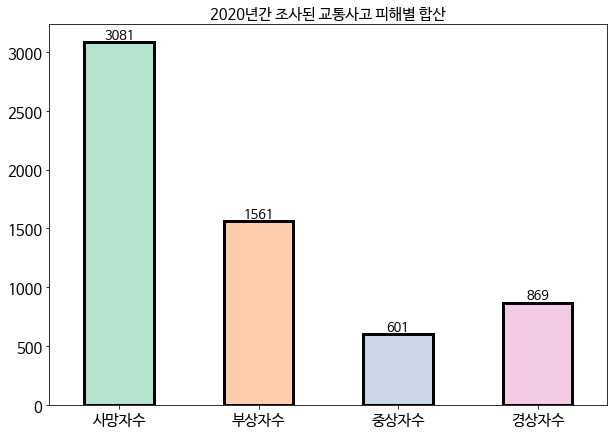

In [ ]:
df_injury = df[["사망자수", "부상자수", "중상자수", "경상자수"]]

ax = df_injury.sum().plot.bar(rot=0, color=colors, figsize=(10, 7),
                         fontsize=15, edgecolor='black', linewidth=3)
plt.title("2020년간 조사된 교통사고 피해별 합산", fontsize=15)
#그래프 위에 숫자 표시
for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=13, color='black', xytext=(0, 10), 
       textcoords='offset points')

plt.show()

## 낮과 밤중 일어난 교통사고 비율 그래프

Text(0.5, 1.0, '주야중 교통사고가 일어난 비율')

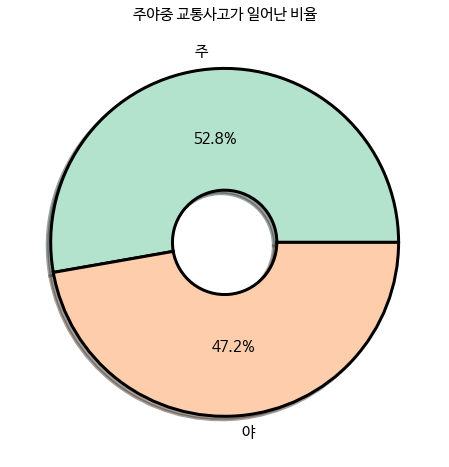

In [ ]:
wedgeprops={'width': 0.7, 'edgecolor': "black", 'linewidth': 3}

df["주야"].value_counts().plot(kind="pie", autopct="%1.1f%%",
                     fontsize=15, shadow=True, colors=colors,
                     wedgeprops=wedgeprops, ylabel='', figsize=(8, 8))

plt.title("주야중 교통사고가 일어난 비율", fontsize=15)

#낮에 일어난 사고가 더 많음.

## 요일별 사고 횟수 그래프

In [ ]:
df_day = df["요일"].value_counts()

weeks = ['월','화','수','목','금','토','일']

df_day = df_day.reindex(weeks)

df_day

#요일 순으로 볼 수 있게끔 reindex를 통해 월화수목금토일 순으로 정렬

월    440
화    434
수    482
목    408
금    453
토    395
일    371
Name: 요일, dtype: int64

Text(0.5, 1.0, '요일별 사고 횟수')

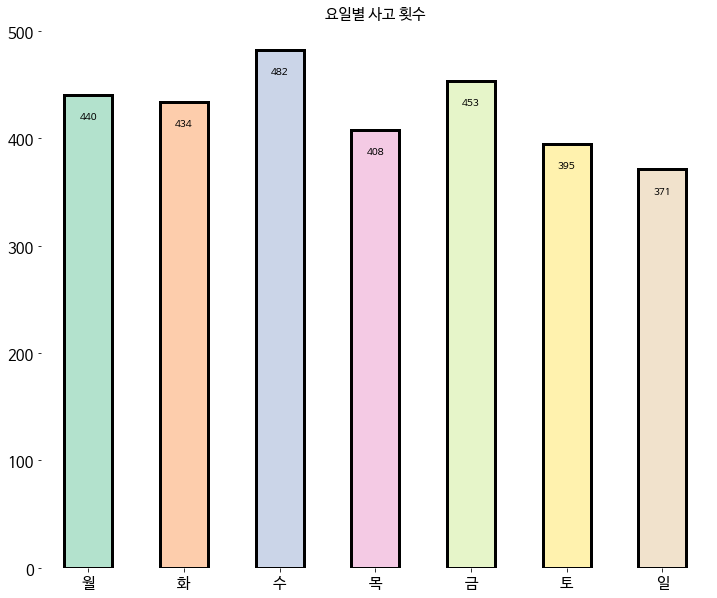

In [ ]:
ax = df_day.plot.bar(rot=0, figsize=(12, 10), color=colors, fontsize=15,
                                edgecolor="black", linewidth=3)
for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points')

plt.box(False)
plt.title("요일별 사고 횟수", fontsize=15)   

#수요일에 일어난 사고가 482회로 가장 많음.

## 사고 유형 그래프

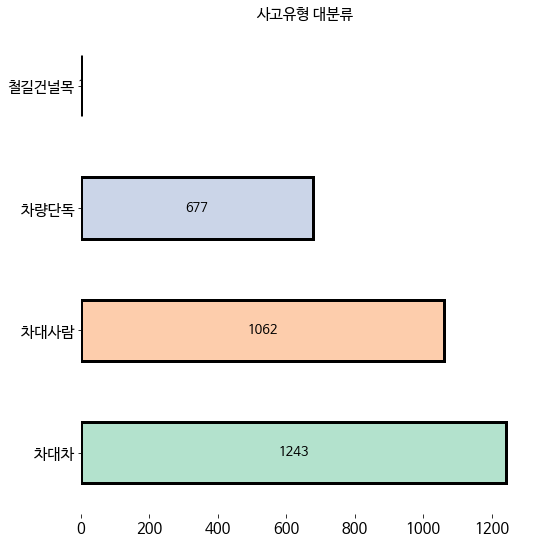

In [ ]:
ax = df["사고유형_대분류"].value_counts().plot.barh(figsize=(8, 9), color=colors, fontsize=15, 
                                        edgecolor="black", linewidth=3)

#그래프 위에 숫자 표시
for x in ax.patches:
    left, bottom, width, height = x.get_bbox().bounds
    ax.annotate("%.0f"%(width), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=13)
plt.box(False)
plt.title("사고유형 대분류", fontsize=15)
plt.show()

#차대차, 차대사람, 차량단독(추락, 장애물충돌 등등) 이 가장 많음.

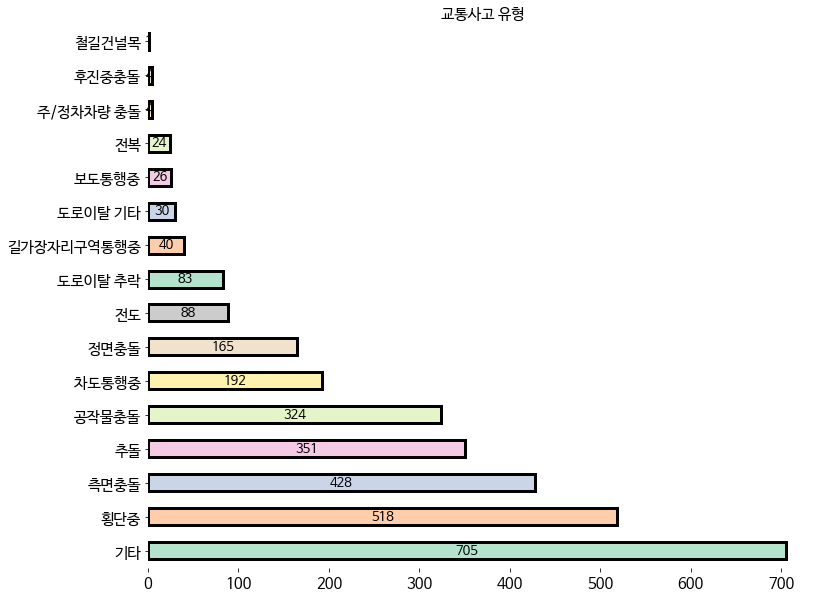

In [ ]:
ax = df["사고유형"].value_counts().plot.barh(figsize=(12, 10), color=colors, fontsize=15
                                        , edgecolor="black", linewidth=3)

#그래프 위에 숫자 표시
for x in ax.patches:
    left, bottom, width, height = x.get_bbox().bounds
    ax.annotate("%.0f"%(width), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=13)
plt.box(False)
plt.title("교통사고 유형", fontsize=15)
plt.show()

#기타를 제외하면 횡단 중 사고가 가장 많음

### 사고유형이 기타인 데이터의 특징을 알아보려고 했으나 도저히 모르겠습니다

In [ ]:
df[df["사고유형"] == "기타"].shape

(705, 16)

In [ ]:
pd.set_option('display.max_row', 705)
pd.set_option('display.max_columns', 16)

df[df["사고유형"] == "기타"]

,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형,가해자법규위반,가해자_당사자종별,피해자_당사자종별,경도,위도
9,2020-01-02 06,주,목,1,0,0,0,경기,수원시,차대차,기타,안전운전 의무 불이행,화물차,화물차,126.957228,37.261472
12,2020-01-02 09,주,목,1,0,0,0,경남,거창군,차대차,기타,안전운전 의무 불이행,이륜차,화물차,127.923296,35.678555
18,2020-01-02 19,야,목,1,0,0,0,경기,광주시,차대사람,기타,안전운전 의무 불이행,승용차,보행자,127.285747,37.384337
21,2020-01-03 02,야,금,1,0,0,0,울산,울주군,차대사람,기타,안전운전 의무 불이행,화물차,보행자,129.121196,35.549174
29,2020-01-03 19,야,금,1,0,0,0,경기,이천시,차대사람,기타,안전운전 의무 불이행,승용차,보행자,127.403933,37.255187
33,2020-01-04 07,주,토,1,0,0,0,제주,제주시,차대사람,기타,과속,화물차,보행자,126.282444,33.386492
43,2020-01-05 20,야,일,1,0,0,0,부산,남구,차대차,기타,안전운전 의무 불이행,승용차,이륜차,129.089329,35.125730
44,2020-01-06 05,야,월,1,0,0,0,경북,구미시,차대사람,기타,안전운전 의무 불이행,승용차,보행자,128.357835,36.119162
55,2020-01-07 17,주,화,1,0,0,0,경기,안성시,차대사람,기타,안전운전 의무 불이행,승용차,보행자,127.355464,37.084310
62,2020-01-09 09,주,목,1,0,0,0,전북,완주군,차량단독,기타,안전운전 의무 불이행,화물차,없음,127.174463,35.917134


In [ ]:
df_gitar = df[["가해자법규위반", "사고유형"]]

df_gitar.loc[df_gitar.value_counts().max()]

가해자법규위반    안전운전 의무 불이행
사고유형                전도
Name: 510, dtype: object

In [ ]:
df_gitar[df_gitar["사고유형"] == "기타"].value_counts()

가해자법규위반      사고유형
안전운전 의무 불이행  기타      510
신호위반         기타       66
과속           기타       41
기타           기타       32
중앙선 침범       기타       31
안전거리 미확보     기타       12
보행자 보호의무 위반  기타        8
교차로 통행방법 위반  기타        5
dtype: int64

In [ ]:
df["사고유형"].value_counts()

기타            705
횡단중           518
측면충돌          428
추돌            351
공작물충돌         324
차도통행중         192
정면충돌          165
전도             88
도로이탈 추락        83
길가장자리구역통행중     40
도로이탈 기타        30
보도통행중          26
전복             24
주/정차차량 충돌       4
후진중충돌           4
철길건널목           1
Name: 사고유형, dtype: int64

In [ ]:
df["사고유형"].value_counts()

기타            705
횡단중           518
측면충돌          428
추돌            351
공작물충돌         324
차도통행중         192
정면충돌          165
전도             88
도로이탈 추락        83
길가장자리구역통행중     40
도로이탈 기타        30
보도통행중          26
전복             24
주/정차차량 충돌       4
후진중충돌           4
철길건널목           1
Name: 사고유형, dtype: int64

In [ ]:
df_gitar[df_gitar["사고유형"] == "기타"]

,가해자법규위반,사고유형
9,안전운전 의무 불이행,기타
12,안전운전 의무 불이행,기타
18,안전운전 의무 불이행,기타
21,안전운전 의무 불이행,기타
29,안전운전 의무 불이행,기타
33,과속,기타
43,안전운전 의무 불이행,기타
44,안전운전 의무 불이행,기타
55,안전운전 의무 불이행,기타
62,안전운전 의무 불이행,기타


In [ ]:
pd.set_option('display.max_row', 2983)
pd.set_option('display.max_columns', 16)

df

,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,발생지시도,발생지시군구,사고유형_대분류,사고유형,가해자법규위반,가해자_당사자종별,피해자_당사자종별,경도,위도
0,2020-01-01 05,야,수,1,0,0,0,서울,강남구,차대사람,차도통행중,안전운전 의무 불이행,승용차,보행자,127.046727,37.486761
1,2020-01-01 05,야,수,1,0,0,0,경기,화성시,차대차,추돌,안전운전 의무 불이행,승용차,화물차,126.950147,37.250560
2,2020-01-01 07,주,수,1,0,0,0,충남,천안시,차대사람,횡단중,안전운전 의무 불이행,승용차,보행자,127.137666,36.826933
3,2020-01-01 10,주,수,1,0,0,0,경남,거창군,차량단독,공작물충돌,안전운전 의무 불이행,화물차,없음,127.924796,35.736290
4,2020-01-01 11,주,수,1,0,0,0,경기,이천시,차량단독,도로이탈 추락,안전운전 의무 불이행,농기계,없음,127.626014,37.103415
5,2020-01-01 19,야,수,1,0,0,0,경북,경주시,차량단독,공작물충돌,안전운전 의무 불이행,화물차,없음,129.289253,35.971651
6,2020-01-01 20,야,수,1,0,0,0,경기,오산시,차대사람,횡단중,과속,승용차,보행자,127.073807,37.150969
7,2020-01-01 21,야,수,1,0,0,0,부산,기장군,차량단독,공작물충돌,안전운전 의무 불이행,승용차,없음,129.255110,35.352053
8,2020-01-02 02,야,목,1,0,0,0,충남,천안시,차량단독,도로이탈 기타,안전운전 의무 불이행,화물차,없음,127.136293,36.773535
9,2020-01-02 06,주,목,1,0,0,0,경기,수원시,차대차,기타,안전운전 의무 불이행,화물차,화물차,126.957228,37.261472


## 두 유형 열을 합쳐 한 그래프에 표시

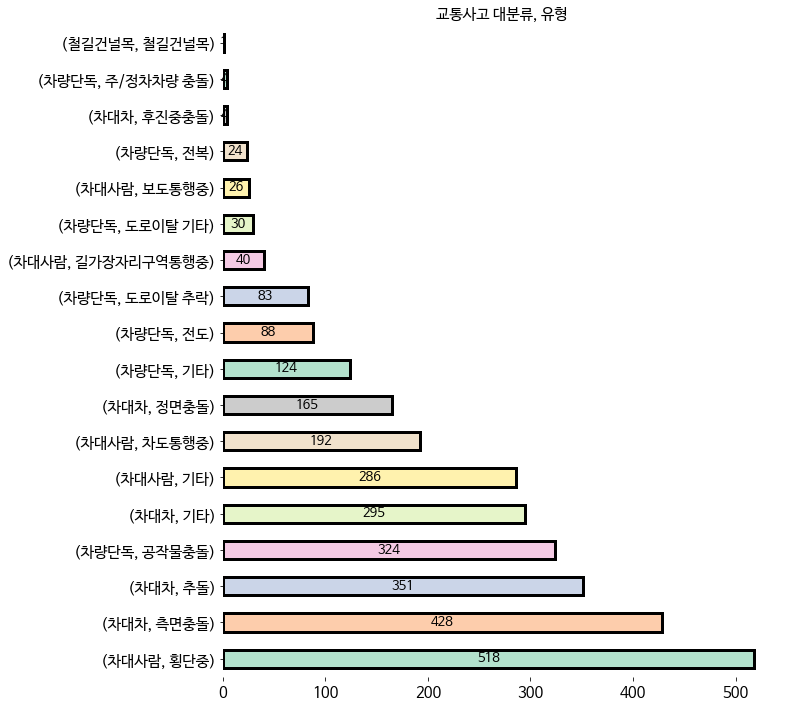

In [ ]:
df_type = df[["사고유형_대분류", "사고유형"]]

df_type = df_type.value_counts().copy()

ax = df_type.plot.barh(figsize=(10, 12), fontsize=15, xlabel="", color=colors,
                  edgecolor="black", linewidth=3)
plt.box(False)
plt.title("교통사고 대분류, 유형", fontsize=15)

for x in ax.patches:
    left, bottom, width, height = x.get_bbox().bounds
    ax.annotate("%.0f"%(width), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=13)

## 가해자의 교통수단 그래프

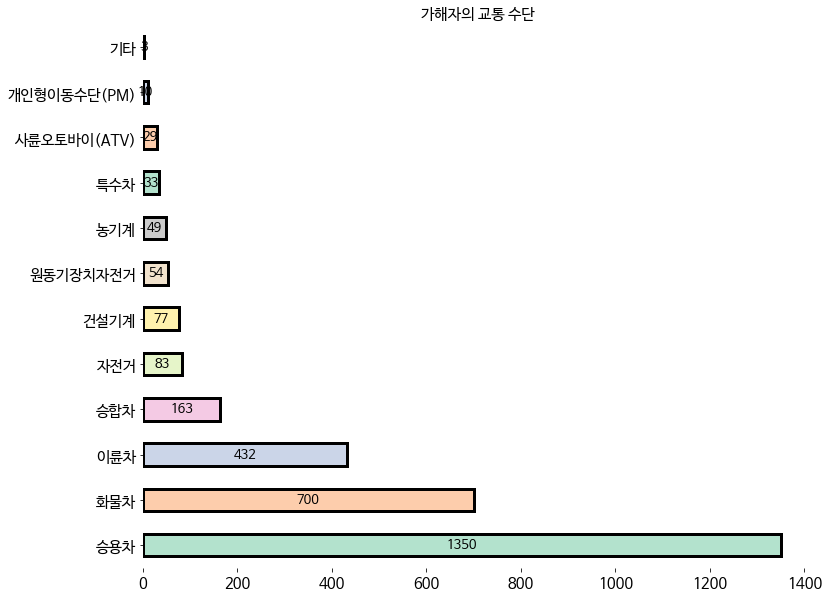

In [ ]:
ax = df["가해자_당사자종별"].value_counts().plot.barh(figsize=(12, 10), color=colors, fontsize=15
                                            , edgecolor='black', linewidth=3)

#그래프 위에 숫자 표시
for x in ax.patches:
    left, bottom, width, height = x.get_bbox().bounds
    ax.annotate("%.0f"%(width), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=13)
plt.box(False)
plt.title("가해자의 교통 수단", fontsize=15)
plt.show()

## 피해자의 교통수단 그래프

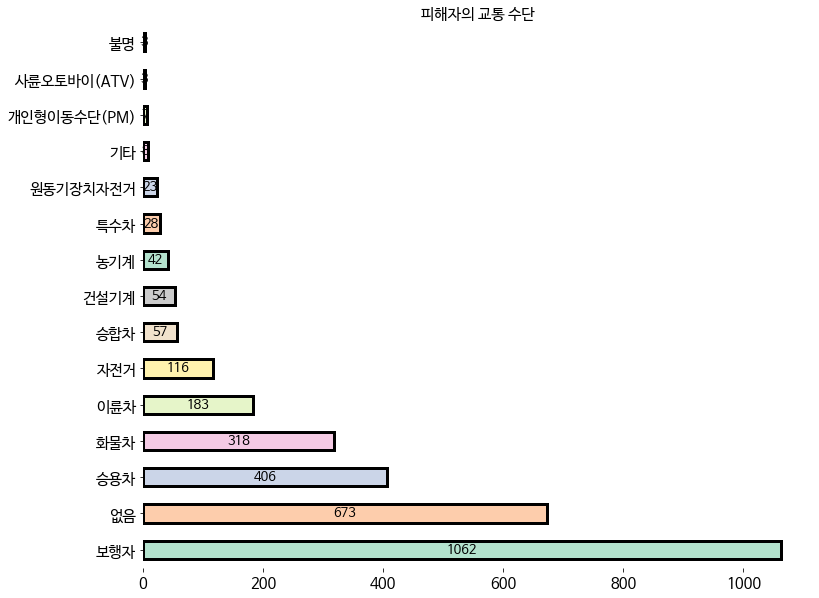

In [ ]:
ax = df["피해자_당사자종별"].value_counts().plot.barh(figsize=(12, 10), color=colors, fontsize=15
                                             , edgecolor='black', linewidth=3)

#그래프 위에 숫자 표시
for x in ax.patches:
    left, bottom, width, height = x.get_bbox().bounds
    ax.annotate("%.0f"%(width), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=13)
plt.box(False)
plt.title("피해자의 교통 수단", fontsize=15)
plt.show()

#보행자가 가장 많고, 피해자 없음(추락, 장애물 충돌 등)이 두번째로 많음.

## 가해자와 피해자의 상황을 좀 더 잘 알기 위한 새로운 데이터프레임 생성

In [ ]:
df_agre_vic = df[["가해자_당사자종별", "피해자_당사자종별"]]

df_agre_vic = df_agre_vic.value_counts().copy()

#20회 이상 일어난 사고 데이터만 필터링
df_agre_vic = df_agre_vic[df_agre_vic >= 20].copy()

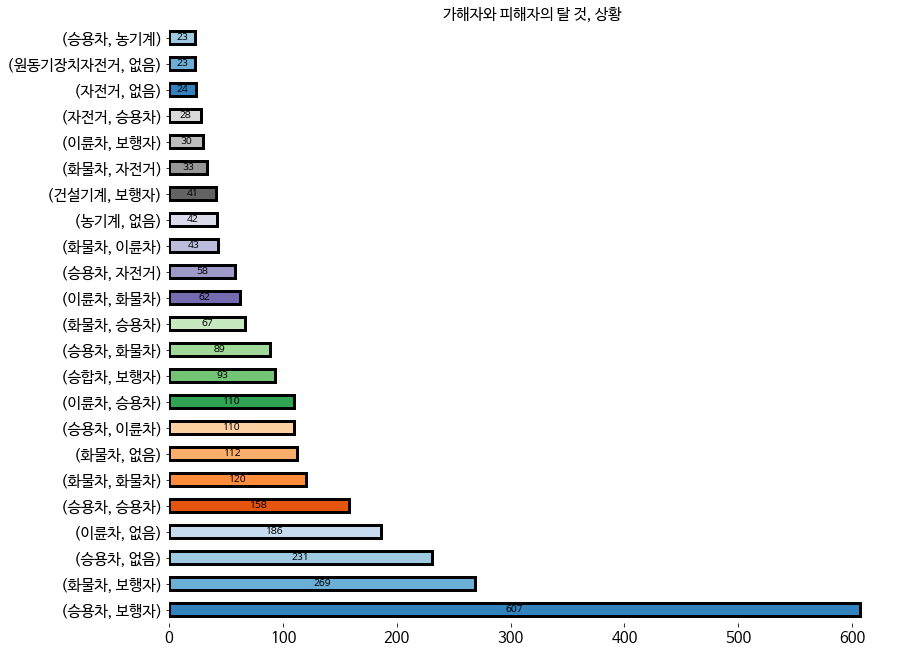

In [ ]:
ax = df_agre_vic.plot.barh(figsize=(13, 11), xlabel='', fontsize=15, color=colors2,
                            linewidth=3, edgecolor="black")

for x in ax.patches:
    left, bottom, width, height = x.get_bbox().bounds
    ax.annotate("%.0f"%(width), xy=(left+width/2, bottom+height/2), ha='center', va='center')

plt.title("가해자와 피해자의 탈 것, 상황", fontsize=15)
plt.box(False)
plt.show()

#가해자 - 승용차, 피해자 - 보행자 인 경우가 가장 많음.

## 종합적으로 알아보기 위한 그래프

In [ ]:
df_person = df[["가해자_당사자종별", "피해자_당사자종별", "가해자법규위반", "사고유형"]]

df_person = df_person.value_counts().copy()

#20회 이상 일어난 사고 데이터만 필터링
df_person = df_person[df_person >= 20].copy()

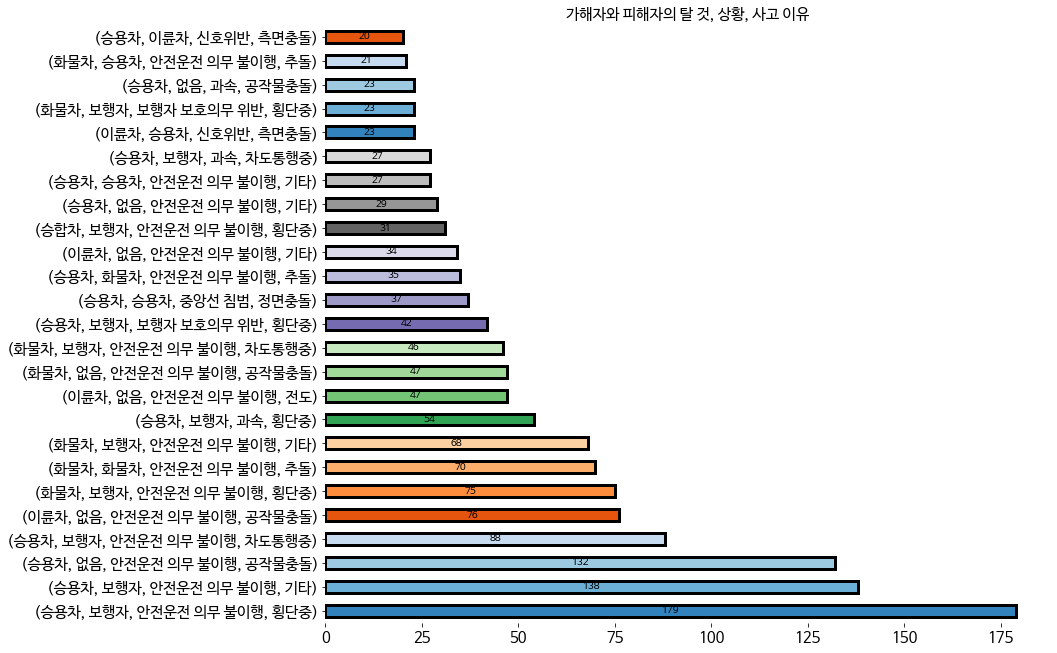

In [ ]:
ax = df_person.plot.barh(figsize=(13, 11), xlabel='', fontsize=15, color=colors2,
                            linewidth=3, edgecolor="black")

for x in ax.patches:
    left, bottom, width, height = x.get_bbox().bounds
    ax.annotate("%.0f"%(width), xy=(left+width/2, bottom+height/2), ha='center', va='center')

plt.title("가해자와 피해자의 탈 것, 상황, 사고 이유", fontsize=15)
plt.box(False)
plt.show()

#가해자 - 승용차, 피해자 - 보행자, 안전운전 의무 불이행, 횡단 중 일어난 사고가 가장 많음.

## Folium으로 지도 시각화

In [ ]:
lat = df["위도"].mean()
long = df["경도"].mean()

In [ ]:
df["위도"].mean()

36.3446901964835

In [ ]:
from folium.plugins import MarkerCluster

m = folium.Map([lat, long], zoom_start=7,
              )
marker_cluster = MarkerCluster().add_to(m)

for i in df.index:
    
        sub_lat = df.loc[i, "위도"]
        sub_long = df.loc[i, "경도"]
        title = df.loc[i, "발생지시도"] + " - " + df.loc[i, "발생지시군구"]
        
        icon_color = "blue"
        
        folium.Marker(
            [sub_lat, sub_long],
            icon=folium.Icon(color=icon_color) ,
            popup="<i>(title)</i>",
            tooltip=title).add_to(marker_cluster)

m.save("index.html")
m

Output hidden; open in https://colab.research.google.com to view.

## 위 지도에서 볼 수 있는 지역별 횟수를 그래프로 표시

Text(0.5, 1.0, '시도별 교통사고 발생 빈도')

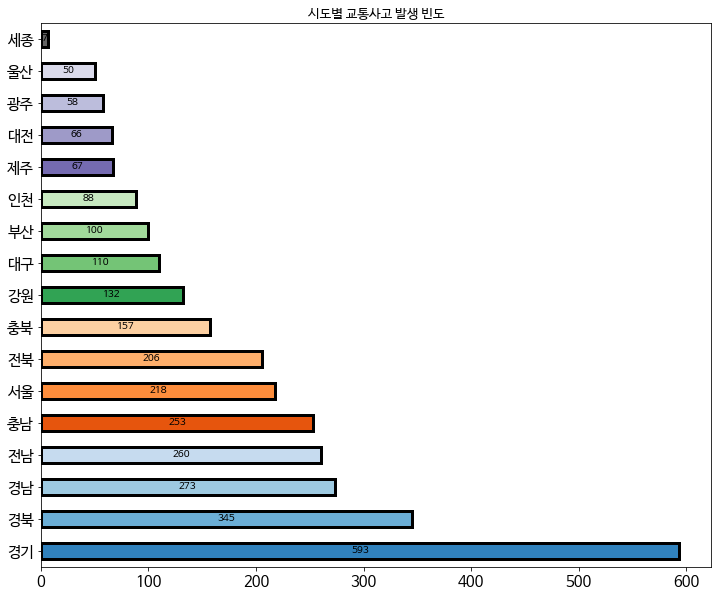

In [ ]:
ax = df["발생지시도"].value_counts().plot.barh(color=colors2, figsize=(12, 10), fontsize=15,
                                    linewidth=3, edgecolor='black')

for x in ax.patches:
    left, bottom, width, height = x.get_bbox().bounds
    ax.annotate("%.0f"%(width), xy=(left+width/2, bottom+height/2), ha='center', va='center')
    
plt.title("시도별 교통사고 발생 빈도", fontsize=13)    

#경기도에서 가장 많은 사고가 일어남

In [ ]:
df_city = df[["발생지시도", "발생지시군구"]]

df_city = df_city.value_counts().copy()

#20회 이상 일어난 사고 데이터만 필터링
df_city = df_city[df_city >= 20].copy()

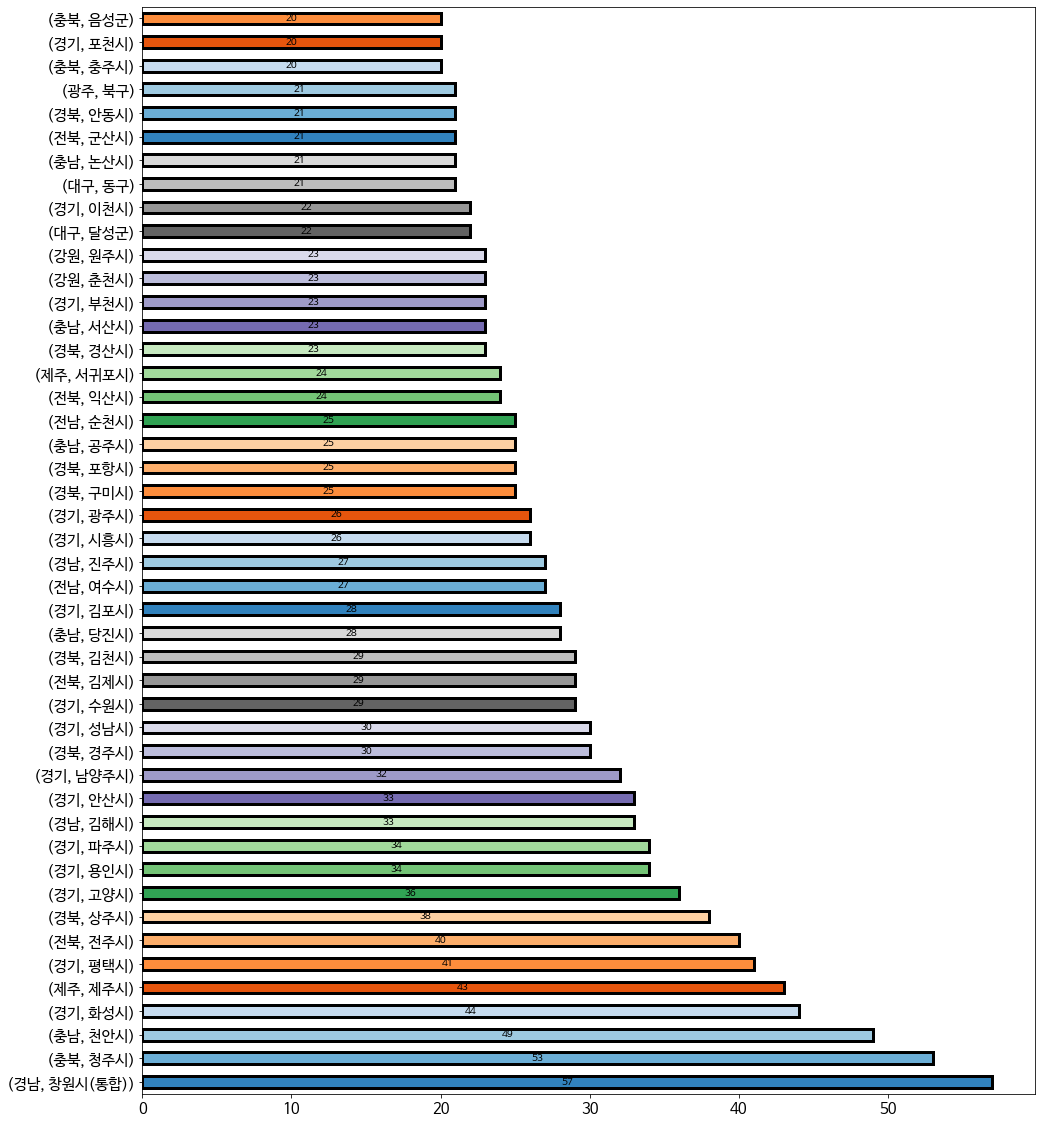

In [ ]:
ax = df_city.plot.barh(color=colors2, figsize=(16, 20), fontsize=15,
                                    linewidth=3, edgecolor='black', xlabel="")
for x in ax.patches:
    left, bottom, width, height = x.get_bbox().bounds
    ax.annotate("%.0f"%(width), xy=(left+width/2, bottom+height/2), ha='center', va='center')
    
    
#경남 - 창원시에서 가장 많은 사고가 일어남.